In [2]:
#!ls ~/trained_models

In [3]:
#!ls ~/trained_models/
from pathlib import Path
from datatype_recovery.models.dataset import load_dataset_from_path
from datatype_recovery.models.dataset.encoding import *

import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

# dataset_path = Path.home()/'datasets/NEW_ENCODING'
# dataset_path = Path.home()/'datasets/stateformer33_5hops'
dataset_path = Path.home()/'datasets/coreutils_5hops'
model_path = Path.home()/'trained_models/dragon_5hops_5heads_3lin__NEW_ENCODING_ep30.pt'

In [4]:
dataset = load_dataset_from_path(dataset_path)
vdf = dataset.read_vars_csv()
vdf

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip
0,1053065,"25,33",__s,char*,register,rax,0.0,PTR,"PTR,char",__s,...,False,1,PLL,P,L,L,1000,l,False,False
1,1053110,"17,26,40,48,62,66",local_10,char*,stack,NaN,-16.0,PTR,"PTR,char",codeset,...,False,1,PLL,P,L,L,1000,l,False,False
2,1053417,"37,78,82,107,111",local_a8,rusage,stack,NaN,-168.0,STRUCT,STRUCT,usage,...,False,0,LLL,L,L,L,1001,l,False,False
3,1053575,"37,94,114",local_b8,timeval,stack,NaN,-184.0,STRUCT,STRUCT,real_end,...,False,0,LLL,L,L,L,1001,l,False,False
4,1053575,"57,160,180,226,246",local_a8,rusage,stack,NaN,-168.0,STRUCT,STRUCT,usage,...,False,0,LLL,L,L,L,1001,l,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,1081800,14,param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False
52880,1081836,"15,21,27,33,39,4...",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False
52881,1081910,"15,21,25",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False
52882,1081955,14,param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False


In [5]:
dataset_path.name
modelcsv = Path.cwd()/f'{model_path.stem}--{dataset_path.name}.modelout.csv'

In [6]:
from datatype_recovery.models.eval import make_predictions_on_dataset

# DEVICE = 'cuda:0'
DEVICE = 'cpu'

if modelcsv.exists():
    print(f'Reading in existing model outputs from {modelcsv}')
    model_pred = pd.read_csv(modelcsv)
else:
    model_pred = make_predictions_on_dataset(model_path, DEVICE, dataset)
    print(f'Saving model predictions to {modelcsv}')
    model_pred.to_csv(modelcsv, index=False)

Reading in existing model outputs from /home/cls0027/dev/datatype-recovery-experiments/notebooks/dragon_5hops_5heads_3lin__NEW_ENCODING_ep30--coreutils_5hops.modelout.csv


In [7]:
model_pred

,BinaryId,FunctionStart,Signature,Vartype,RawPred,Pred,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize
0,1000,1053065,"25,33",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
1,1000,1053110,"17,26,40,48,62,66",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
2,1001,1053417,"37,78,82,107,111",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
3,1001,1053417,"78,82,107,111,130",p,"PTR,STRUCT","PTR,STRUCT",PLL,P,L,L,STRUCT,False,False,0
4,1001,1053575,"37,94,114",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,1116,1081836,"15,21,27,33,39,4...",p,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52880,1116,1081910,"15,21,25",p,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52881,1116,1081955,14,p,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52882,1116,1081991,"60,67,73",l,int32,int32,LLL,L,L,L,BUILTIN,True,False,4


In [8]:
mdf = vdf.merge(model_pred, how='right', on=['BinaryId','FunctionStart','Signature','Vartype'])
mdf['LeafType'] = mdf.TypeSeq_Debug.apply(lambda x: x.split(',')[-1])
mdf['PredLeafType'] = mdf.Pred.apply(lambda x: x.split(',')[-1])
mdf

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,LeafType,PredLeafType
0,1053065,"25,33",__s,char*,register,rax,0.0,PTR,"PTR,char",__s,...,PLL,P,L,L,BUILTIN,True,False,1,char,char
1,1053110,"17,26,40,48,62,66",local_10,char*,stack,NaN,-16.0,PTR,"PTR,char",codeset,...,PLL,P,L,L,BUILTIN,True,False,1,char,char
2,1053417,"37,78,82,107,111",local_a8,rusage,stack,NaN,-168.0,STRUCT,STRUCT,usage,...,LLL,L,L,L,STRUCT,False,False,0,STRUCT,STRUCT
3,1053417,"78,82,107,111,130",param_1,timeval*,register,rdi,56.0,PTR,"PTR,STRUCT",ts,...,PLL,P,L,L,STRUCT,False,False,0,STRUCT,STRUCT
4,1053575,"37,94,114",local_b8,timeval,stack,NaN,-184.0,STRUCT,STRUCT,real_end,...,LLL,L,L,L,STRUCT,False,False,0,STRUCT,STRUCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,1081836,"15,21,27,33,39,4...",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,LLL,L,L,L,BUILTIN,True,False,4,int32,int32
52880,1081910,"15,21,25",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,LLL,L,L,L,BUILTIN,True,False,4,int32,int32
52881,1081955,14,param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,LLL,L,L,L,BUILTIN,True,False,4,int32,int32
52882,1081991,"60,67,73",uVar1,uint64,register,rax,0.0,BUILTIN,uint64,_Var1,...,LLL,L,L,L,BUILTIN,True,False,4,char,int32


In [9]:
import seaborn as sns

# context: talk, notebook, paper, poster
# palette: muted, Paired, hls, husl, pastel, bright, deep, dark, colorblind
sns.set_theme(style='whitegrid', context='notebook', palette='muted')

In [10]:
def percent_accuracy(df:pd.DataFrame, col1:str, col2:str) -> float:
    return len(df[df[col1]==df[col2]])/len(df)*100

acc = percent_accuracy(mdf, 'TypeSeq_Debug', 'Pred')
acc_raw = percent_accuracy(mdf, 'TypeSeq_Debug', 'RawPred')

print(f'Eval dataset size = {len(mdf):,}')
print(f'Accuracy: {acc:.2f}%')
print(f'Accuracy (raw): {acc_raw:.2f}%')

Eval dataset size = 52,884
Accuracy: 70.63%
Accuracy (raw): 70.63%


In [11]:
mdf[['TypeSeq_Debug','Pred','LeafType','PredLeafType']]

,TypeSeq_Debug,Pred,LeafType,PredLeafType
0,"PTR,char","PTR,char",char,char
1,"PTR,char","PTR,char",char,char
2,STRUCT,STRUCT,STRUCT,STRUCT
3,"PTR,STRUCT","PTR,STRUCT",STRUCT,STRUCT
4,STRUCT,STRUCT,STRUCT,STRUCT
...,...,...,...,...
52879,int32,int32,int32,int32
52880,int32,int32,int32,int32
52881,int32,int32,int32,int32
52882,char,int32,char,int32


In [12]:
def plot_accuracies(df:pd.DataFrame, truth_outputs:List[str], rot:int=25, figsize=None):
    acc_values = []

    for t in truth_outputs:
        pred = f'Pred{t}'
        acc = percent_accuracy(df, t, pred)
        # print(f'{t} accuracy: {acc:.2f}%')
        acc_values.append((t, acc))

    ax = pd.DataFrame.from_records(acc_values, columns=['Output', 'Accuracy']).set_index('Output')\
        .Accuracy.sort_values(ascending=True).plot(kind='bar', rot=rot, title='Accuracy',
            ylabel='Accuracy (%)', xlabel='Classifier', figsize=figsize)
        # .sort_values('Accuracy',ascending=False).

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')#, label_type='center')

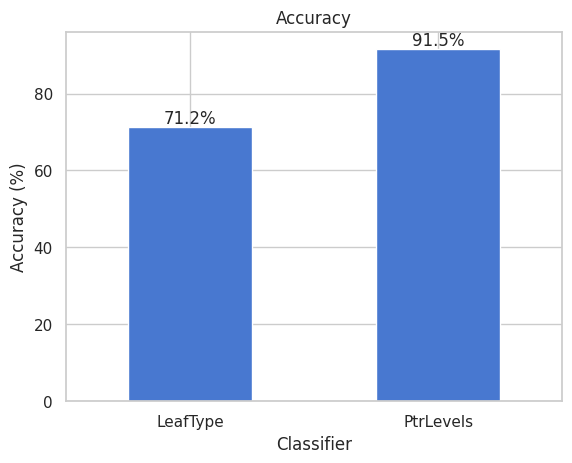

In [13]:
primary_outputs = ['PtrLevels','LeafType']
detailed_outputs = ['LeafCategory', 'LeafSigned', 'LeafFloating', 'LeafSize',
               'PtrL1', 'PtrL2', 'PtrL3']

plot_accuracies(mdf, primary_outputs, rot=0)

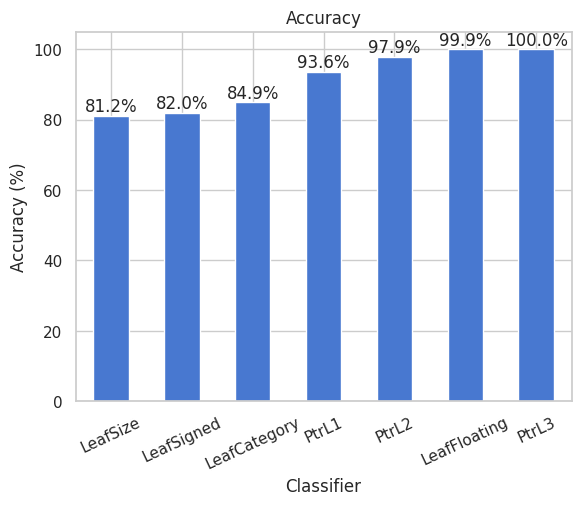

In [14]:
plot_accuracies(mdf, detailed_outputs)

<Axes: title={'center': 'Incorrect LeafType Predictions'}, xlabel='LeafCategory'>

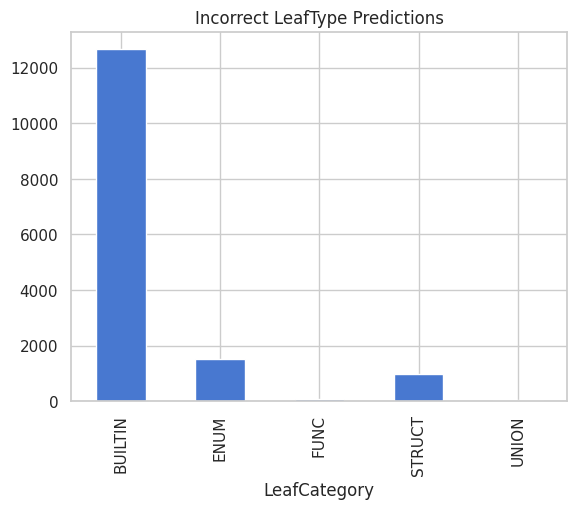

In [15]:
mdf[mdf.LeafType!=mdf.PredLeafType].groupby('LeafCategory').count().FunctionStart.plot(kind='bar',
    title='Incorrect LeafType Predictions')

<Axes: title={'center': 'Dataset by LeafCategory'}, xlabel='LeafCategory'>

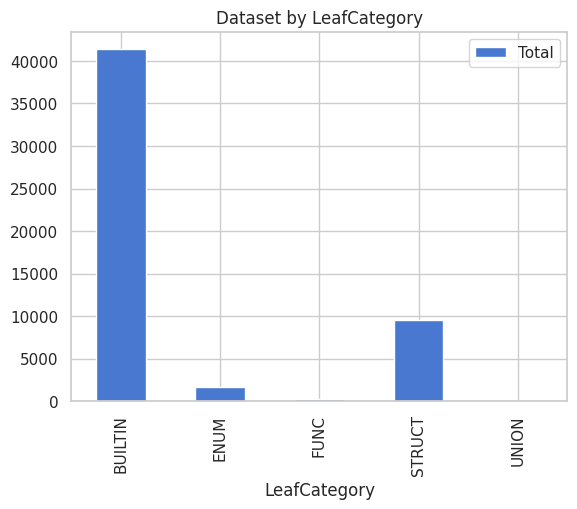

In [16]:
# print(f'{12661/41369*100:.2f}%')
# print(f'{28708/41369*100:.2f}%')
# print(f'{12661+28708:,}')

total_by_lcat = mdf.groupby('LeafCategory').count()[['FunctionStart']].rename({'FunctionStart':'Total'},axis=1)
total_by_lcat.plot(kind='bar', title='Dataset by LeafCategory')

<Axes: title={'center': 'Dataset by LeafType'}, xlabel='LeafType'>

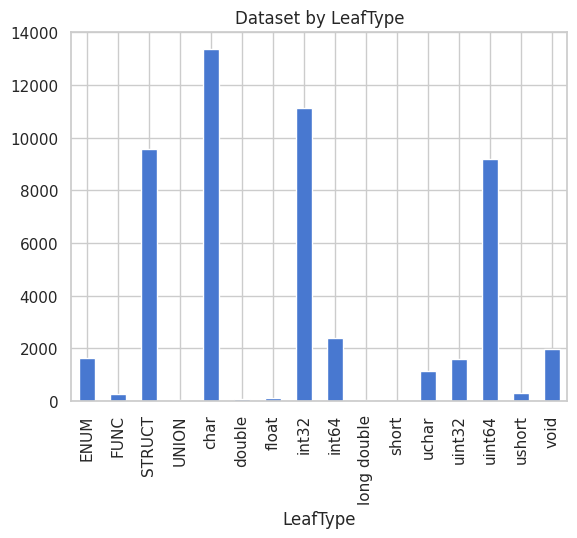

In [17]:
mdf.groupby('LeafType').count().FunctionStart.plot(kind='bar',title='Dataset by LeafType')

array([6.4, 4.8])

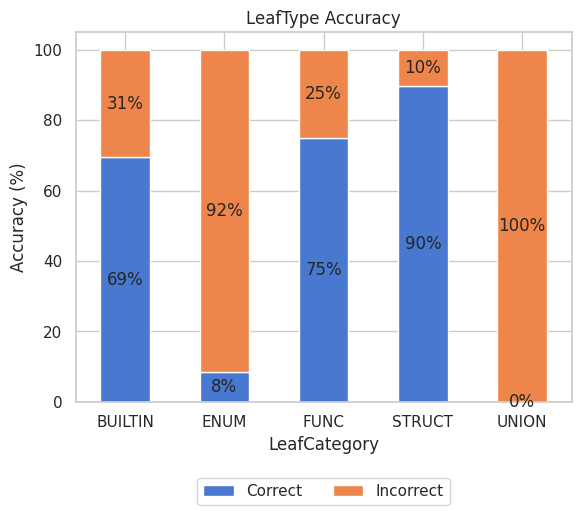

In [18]:

ldf = mdf.groupby([mdf.LeafType==mdf.PredLeafType, 'LeafCategory']).count()[['FunctionStart']]
ldf = ldf.reset_index(names=['Correct','LeafCategory'])\
    .pivot(index='LeafCategory', columns='Correct', values='FunctionStart')\
    .rename({False: 'Incorrect', True: 'Correct'},axis=1)

ldf['Total'] = total_by_lcat
ldf['Incorrect'] = ldf.Incorrect/ldf.Total*100
ldf['Correct'] = ldf.Correct/ldf.Total*100
ax = ldf[['Correct','Incorrect']].plot(kind='bar', stacked=True, rot=0, title='LeafType Accuracy',
    ylabel='Accuracy (%)', xlabel='LeafCategory')
ax.legend(loc='lower center', bbox_to_anchor=(.5,-0.3), ncol=2)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center')
ax.get_figure().get_size_inches()

In [19]:
# mdf[(mdf.LeafType!=mdf.PredLeafType)&(mdf.LeafCategory=='BUILTIN')].groupby('LocType_Strip').count().FunctionStart.plot(kind='bar')

# ----------------------------------------
# TODO: PICK UP HERE
#
# set up functions that accept a dataframe (or an interesting subset like this one)
# ----------------------------------------

# TODO - given this df, plot the correct/incorrect predictions SIDE BY SIDE as a grouped or stacked bar chart
# (like above)

# TODO: basically, convert the code above into a function that:
#   --> accepts a dataframe (incl. a subset)
#   --> accepts a condition to split on (leaftype!=predleaftype)
#   --> accepts a column to group the results by (LeafCategory above, the pivot index)
#   --> lets me choose to show percentages or values
# - percentages are nice when scales are out of whack, but you lose track of what's significant

subset_df = mdf.loc[mdf.LeafCategory=='BUILTIN']

<Axes: title={'center': 'Accuracy by Location'}, xlabel='LocType_Strip'>

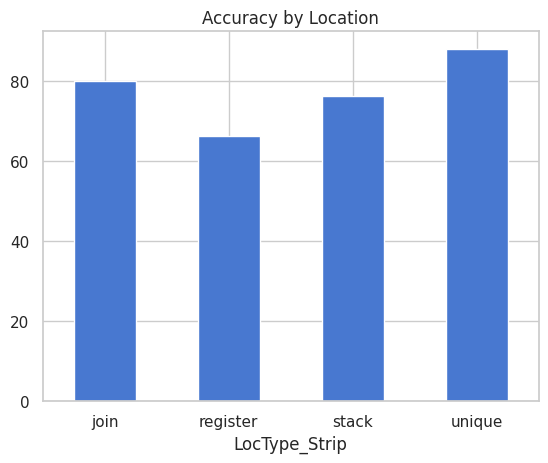

In [20]:

# len(subset_df[subset_df.TypeSeq_Debug==subset_df.Pred])/len(subset_df)*100
mdf['Correct'] = mdf.TypeSeq_Debug==mdf.Pred
mdf.groupby('LocType_Strip').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar',rot=0,
title='Accuracy by Location')

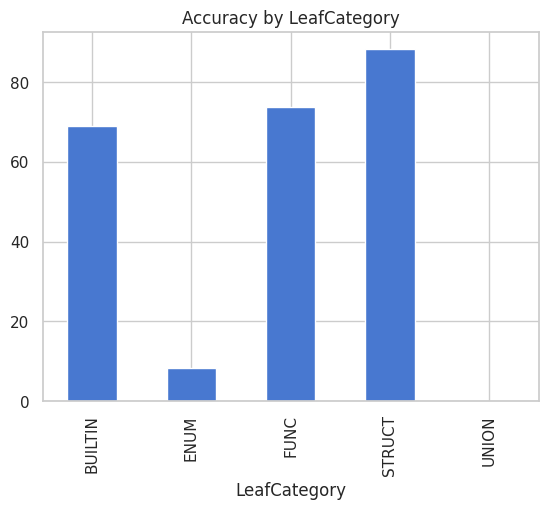

In [21]:
ax = mdf.groupby('LeafCategory').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar',
    title='Accuracy by LeafCategory')

<Axes: title={'center': 'Inaccuracy by LeafType'}, xlabel='LeafType'>

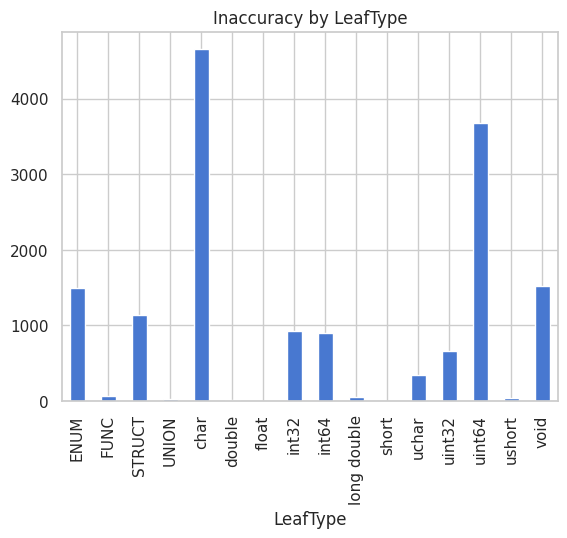

In [22]:
mdf.groupby('LeafType').apply(lambda gb: (len(gb)-gb.Correct.sum())).plot(kind='bar',
title='Inaccuracy by LeafType')

# mdf.groupby('LeafCategory').count().FunctionStart.plot(kind='bar')

<Axes: xlabel='PredLeafType'>

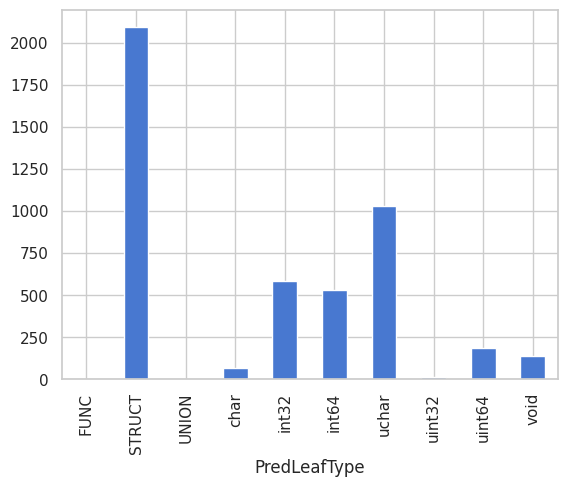

In [23]:
mdf.loc[(mdf.LeafType=='char')&(~mdf.Correct)].groupby('PredLeafType').count().FunctionStart.plot(kind='bar')

<Axes: xlabel='BinaryId'>

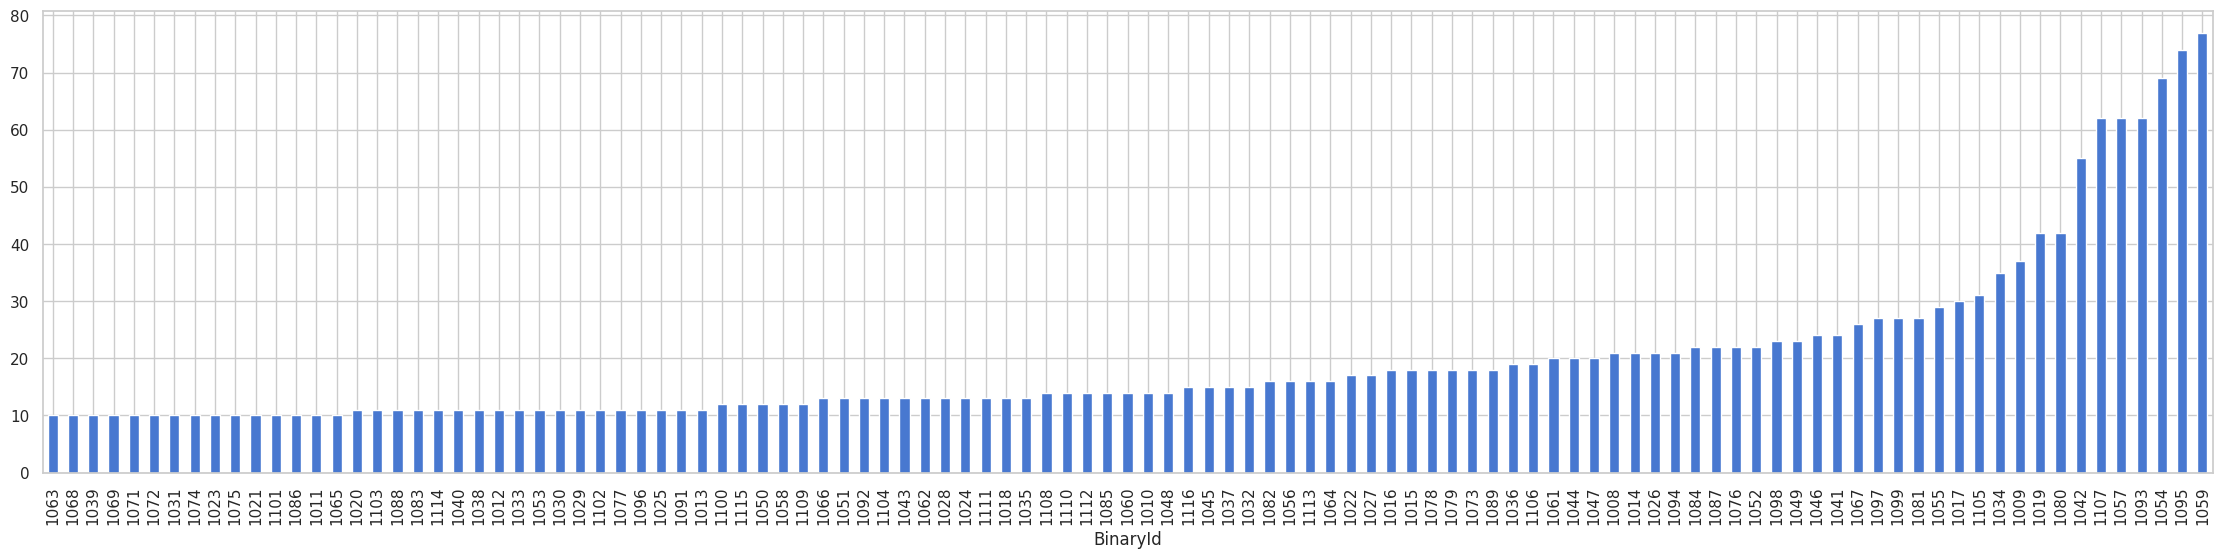

In [72]:
mdf.loc[(mdf.LeafType=='char')&(~mdf.Correct)&(mdf.PredLeafType=='STRUCT')].groupby('BinaryId').count().FunctionStart.sort_values()\
    .plot(kind='bar',figsize=(28,6))

In [24]:
bdf = dataset.read_binaries_csv()

In [25]:
bdf[bdf.BinaryId==1037]

,BinaryId,Name,RunGid,OrigBinaryId
37,1037,mknod,0,37


In [26]:
len(mdf[mdf.TypeSeq_Debug.apply(lambda x: x.split(',')[0])==mdf.Pred.apply(lambda x: x.split(',')[0])])/len(mdf)

0.8422963467211255

In [74]:
bin1059 = mdf.BinaryId==1059

row = mdf.loc[(mdf.LeafType=='char')&(~mdf.Correct)&(mdf.PredLeafType=='STRUCT')&(bin1059)].iloc[0]
print(f'Binary: {bdf[bdf.BinaryId==row.BinaryId].Name.item()}')
print(hex(row.FunctionStart))
row

Binary: ginstall
0x104ca7


FunctionStart                     1068199
Signature                  48,165,279,358
Name_Strip                        param_1
Type_Strip                         uint64
LocType_Strip                    register
LocRegName_Strip                      rdi
LocOffset_Strip                      56.0
TypeCategory_Strip                BUILTIN
TypeSeq_Strip                      uint64
Name_Debug                           file
Type_Debug                          char*
LocType_Debug                    register
LocRegName_Debug                      rdi
LocOffset_Debug                      56.0
TypeCategory_Debug                    PTR
TypeSeq_Debug                    PTR,char
HasDWARF                             True
TypeJson_Debug        {"kind": "Pointe...
LeafCategory                      BUILTIN
LeafSigned                           True
LeafFloating                        False
LeafSize                                1
PtrLevels                             PLL
PtrL1                             

In [29]:
mdf[mdf.LeafSize==1].groupby('LeafType').count()

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,PredLeafType,Correct
LeafType,,,,,,,,,,,,,,,,,,,,,
char,13365,13365,13365,13365,13365,8141,13365,13365,13365,13365,...,13365,13365,13365,13365,13365,13365,13365,13365,13365,13365
uchar,1162,1162,1162,1162,1162,381,1162,1162,1162,1162,...,1162,1162,1162,1162,1162,1162,1162,1162,1162,1162


<Axes: title={'center': 'Register Variable Accuracy'}, xlabel='LeafCategory'>

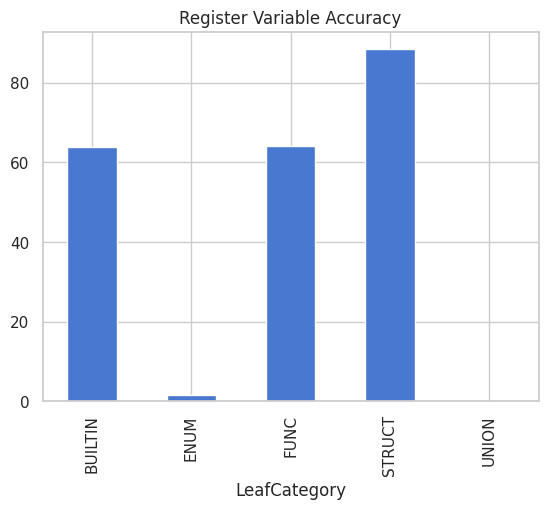

In [30]:
reg_df = mdf.loc[mdf.LocType_Strip=='register',:]
reg_df.groupby('LeafCategory').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar',title='Register Variable Accuracy')

<Axes: title={'center': 'Regvar Accuracy by LeafType'}, xlabel='LeafType'>

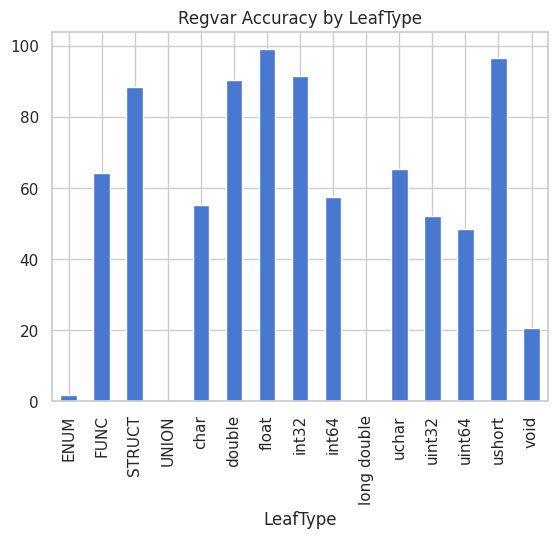

In [31]:
reg_df.groupby('LeafType').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar',
title='Regvar Accuracy by LeafType')

<Axes: title={'center': 'Regvar Inaccuracy by LeafType'}, xlabel='LeafType'>

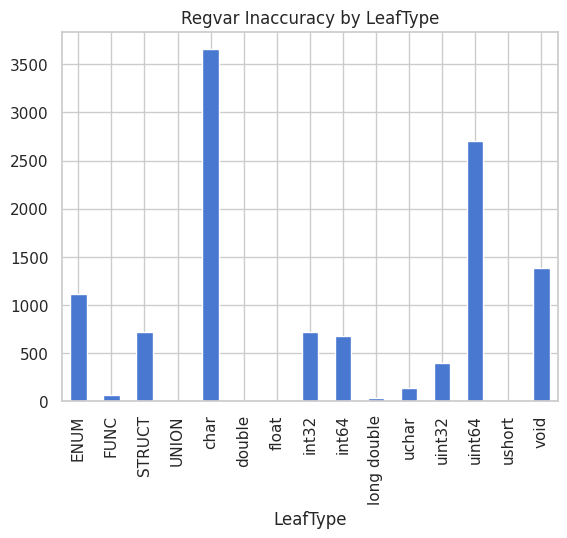

In [32]:
reg_df.groupby('LeafType').apply(lambda gb: (len(gb)-gb.Correct.sum())).plot(kind='bar',
title='Regvar Inaccuracy by LeafType')

In [33]:
reg_df.groupby('LeafType').count()[['FunctionStart']].sort_values('FunctionStart')

,FunctionStart
LeafType,
UNION,5
long double,34
double,73
float,100
FUNC,184
ushort,252
uchar,381
uint32,821
ENUM,1129


In [34]:
reg_df[reg_df.LeafType=='char'][['TypeSeq_Debug','LeafType','Pred','PredLeafType']]

,TypeSeq_Debug,LeafType,Pred,PredLeafType
0,"PTR,char",char,"PTR,char",char
11,"PTR,char",char,"PTR,uchar",uchar
18,"PTR,PTR,char",char,"PTR,PTR,uchar",uchar
77,"PTR,char",char,"PTR,uchar",uchar
84,"PTR,PTR,char",char,"PTR,PTR,uchar",uchar
...,...,...,...,...
52860,"PTR,char",char,"PTR,char",char
52862,"PTR,char",char,"PTR,char",char
52866,"PTR,char",char,"PTR,char",char
52869,char,char,int32,int32


In [35]:
reg_df[reg_df.LeafType=='uchar']

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,LeafType,PredLeafType,Correct
479,1059674,"52,57,210,215",bVar2,uchar,register,al,0.0,BUILTIN,uchar,bVar2,...,L,L,L,BUILTIN,False,False,1,uchar,uchar,True
1295,1103344,"805,819,908,940,969",bVar2,uchar,register,al,0.0,BUILTIN,uchar,bVar3,...,L,L,L,BUILTIN,False,False,1,uchar,uchar,True
1296,1103344,"885,899,940,969",bVar3,uchar,register,al,0.0,BUILTIN,uchar,bVar4,...,L,L,L,BUILTIN,False,False,1,uchar,uchar,True
1682,1132557,"962,969,993,2034...",bVar1,uchar,register,al,0.0,BUILTIN,uchar,bVar1,...,L,L,L,BUILTIN,False,False,1,uchar,uchar,True
1748,1136496,"93,413",param_4,int64,register,rcx,8.0,BUILTIN,int64,trans,...,L,L,L,BUILTIN,False,False,8,uchar,uint64,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50436,1069397,"104,112,166,174",bVar1,uchar,register,al,0.0,BUILTIN,uchar,bVar1,...,L,L,L,BUILTIN,False,False,1,uchar,uchar,True
50442,1069659,"72,91",bVar1,uchar,register,al,0.0,BUILTIN,uchar,bVar1,...,L,L,L,BUILTIN,False,False,1,uchar,uchar,True
50992,1058953,"21,44",param_1,uchar,register,dil,56.0,BUILTIN,uchar,ch,...,L,L,L,BUILTIN,True,False,1,uchar,char,False
51674,1058921,"21,44",param_1,uchar,register,dil,56.0,BUILTIN,uchar,ch,...,L,L,L,BUILTIN,True,False,1,uchar,char,False


<Axes: xlabel='LeafType'>

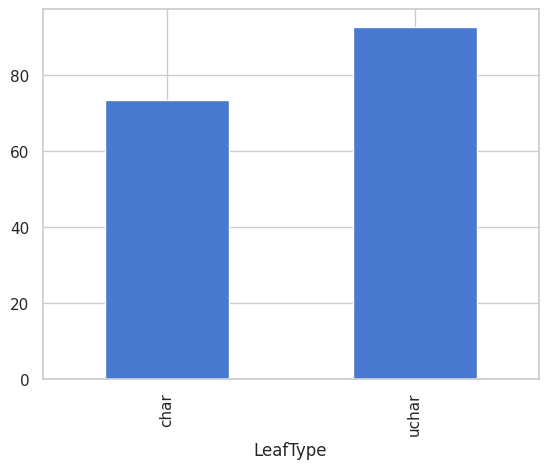

In [36]:
# mdf.loc[mdf.LeafSize==1,:].groupby('LeafType').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar')
mdf.loc[mdf.LeafSize==1,:].groupby('LeafType').apply(lambda gb: (gb.LeafSize==gb.PredLeafSize).sum()/len(gb)*100).plot(kind='bar')

True type is char, but we got it wrong - what size did we predict?

<Axes: xlabel='PredLeafSize'>

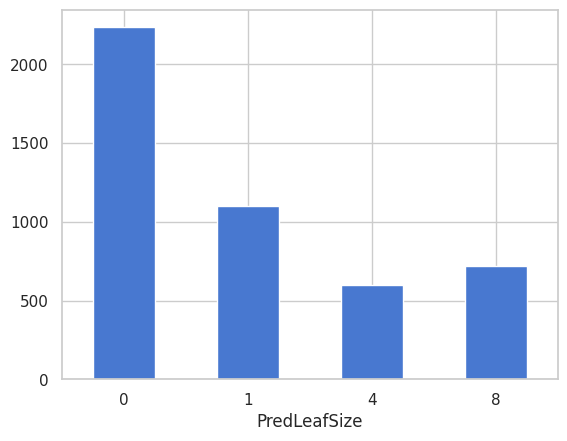

In [37]:
mdf.loc[(mdf.LeafType=='char')&(~mdf.Correct),:].groupby('PredLeafSize').count().FunctionStart.plot(kind='bar',rot=0)

> **Apparently, we often confusing true `char*` types with `STRUCT*`...why?**

- Maybe `LeafCategory` should feed into `LeafSize`...? (this was my original idea anyway)
- Do we need to increase width/depth of task-specific layer(s)?
- Maybe add more training data too (was at 200k vars...go up to 500k?)

> *What if we increase just `LeafCategory`'s depth and leave others independent/alone...does it noticeably improve?*

<Axes: xlabel='Pred'>

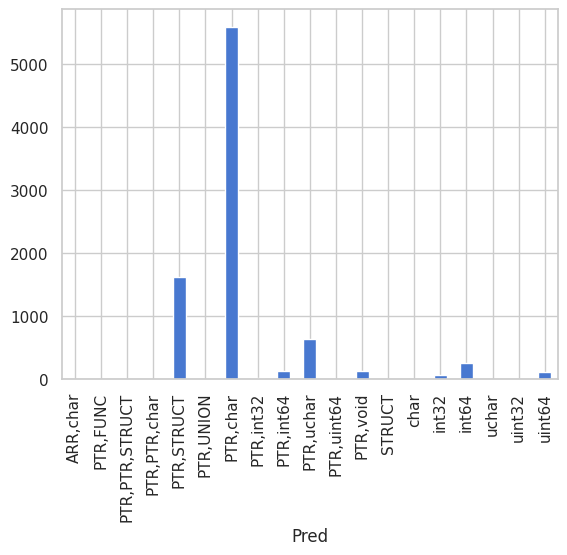

In [38]:
# mdf.loc[(mdf.TypeSeq_Debug=='PTR,char')&(~mdf.Correct),:].groupby('Pred').count().FunctionStart.plot(kind='bar')
mdf.loc[(mdf.TypeSeq_Debug=='PTR,char'),:].groupby('Pred').count().FunctionStart.plot(kind='bar')

In [39]:
no_regs = mdf.loc[mdf.LocType_Strip!='register']
len(no_regs[no_regs.TypeSeq_Strip==no_regs.TypeSeq_Debug])/len(no_regs)
len(reg_df[reg_df.TypeSeq_Strip==reg_df.TypeSeq_Debug])/len(reg_df)
len(no_regs)

18472

In [40]:
import numpy as np
mdf.groupby(np.where(mdf.LeafType==mdf.PredLeafType, 'Correct','Incorrect')).count()

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,LeafType,PredLeafType,Correct
Correct,37652,37652,37652,37652,37652,22962,37652,37652,37652,37652,...,37652,37652,37652,37652,37652,37652,37652,37652,37652,37652
Incorrect,15232,15232,15232,15232,15232,11450,15232,15232,15232,15232,...,15232,15232,15232,15232,15232,15232,15232,15232,15232,15232


In [41]:
model_pred

# TODO: sort individual classifiers - show highest performing!
# TODO: update this eval notebook and compute RESULTS
# TODO - update model to feed some outputs into other task-specific layers (see diagram)
# TODO - retrain with bigger dataset (w/e my custom training dataset was before?)
# TODO - overall accuracy? raw vs. corrected?
# TODO - individual classifiers? (leaf category, ptrl1, floating, signed...)
# TODO - accuracy on PTR,STRUCT true types?
#           -> locals vs. params? non-unique? register? ...
# TODO - eval on benchmarks vs. others (DIRTY, OSPREY, StateFormer...?)
# TODO - ok, what other experiments do we need to run to publish?
# ---> evaluate scalability?

,BinaryId,FunctionStart,Signature,Vartype,RawPred,Pred,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize
0,1000,1053065,"25,33",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
1,1000,1053110,"17,26,40,48,62,66",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
2,1001,1053417,"37,78,82,107,111",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
3,1001,1053417,"78,82,107,111,130",p,"PTR,STRUCT","PTR,STRUCT",PLL,P,L,L,STRUCT,False,False,0
4,1001,1053575,"37,94,114",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,1116,1081836,"15,21,27,33,39,4...",p,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52880,1116,1081910,"15,21,25",p,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52881,1116,1081955,14,p,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52882,1116,1081991,"60,67,73",l,int32,int32,LLL,L,L,L,BUILTIN,True,False,4


# Dataset Balance

<Axes: xlabel='LeafCategory'>

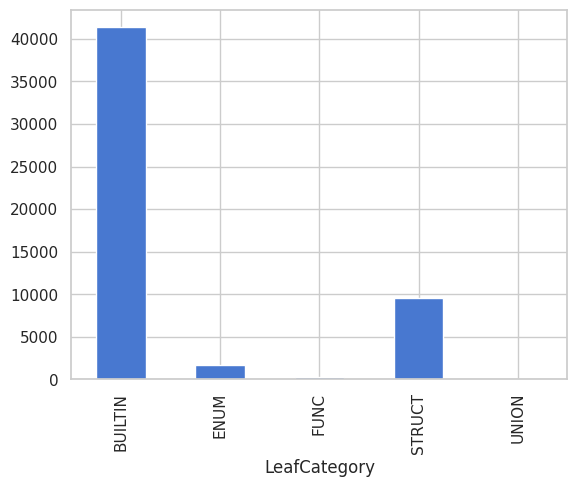

In [42]:
vdf.groupby('LeafCategory').count().FunctionStart.plot(kind='bar')